# SVM Exercises

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

Load Pima diabetes dataset

In [ ]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
invalid = ['plas', 'pres', 'skin', 'test', 'mass']
data = pd.read_csv(url, names=names)

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

Split data into training, colidation, and test sets with a test size of 25%

In [ ]:
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

Create a model with sklearn's SVC and a high gamma value (perhaps 1.0)

In [ ]:
svm_high = SVC(gamma=1.0)
svm_high.fit(X_train, y_train)

SVC(gamma=1.0)

Print accuracy of training and validation data

In [ ]:
y_train_pred=svm_high.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm_high.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  67.56756756756756


Create a model with sklearn's SVC and a low gamma value (perhaps .001)

In [ ]:
svm_low = SVC(gamma=0.001)
svm_low.fit(X_train, y_train)

SVC(gamma=0.001)

Print accuracy of training and validation data

In [ ]:
y_train_pred_low = svm_low.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_low)*100)
y_val_pred_low = svm_low.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_low)*100)

Training Accuracy is  87.27272727272727
Validation Accuracy is  74.32432432432432


Explain the accuracy results below. 

The model with the high gamma value may have overfit to the training data, since only nearby points are considered for the decision boundary, leading to a high training accuracy but a much lower validation accuracy. On the other hand, the model with the low gamma value also takes into account farther points in the training data to create the decision boundary, causing the validation accuracy to be greater.

Print the confusion matrices for your high and low gamma models (both numeric and visualized)

High gamma model:
[[50  0]
 [24  0]]
<ipython-input-8-3f371a944108>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, fontsize=16)
<ipython-input-8-3f371a944108>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, fontsize=16)


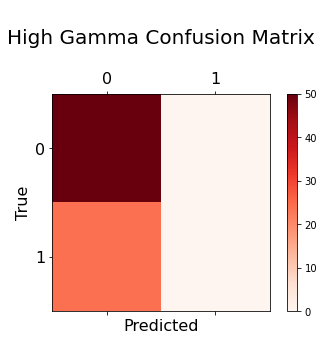

Low gamma model:
[[48  2]
 [17  7]]


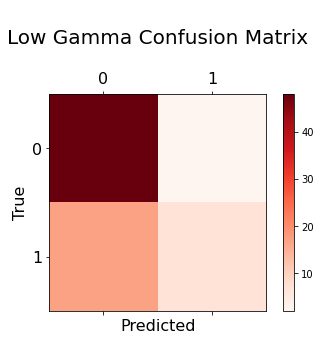

In [ ]:
labels = [0, 1]

cm_high = metrics.confusion_matrix(y_val, y_val_pred, labels=labels)
cm_low = metrics.confusion_matrix(y_val, y_val_pred_low, labels=labels)

def plot_cmatrix(cm,title):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()

print('High gamma model:')
print(cm_high)
plot_cmatrix(cm_high, 'High Gamma Confusion Matrix')

print('Low gamma model:')
print(cm_low)
plot_cmatrix(cm_low, 'Low Gamma Confusion Matrix')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e65ab1c-218c-4689-b130-b98413f4efb9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>